## Orthogonal view

Figure 2 represents an image and its corresponding prediction in its orthogonal view. Here, the code is used to compute those images. The orthogonal view will be shown for a P20 image.

A custom function has been written for it.

In [1]:
import apoc
import matplotlib.pyplot as plt
import numpy as np
import pyclesperanto_prototype as cle

import sys
sys.path.append("../../")
from quapos_lm import orthogonal_view, rescale_segmentation, rescale_image, predict_image

In [2]:
# Load classifier
quapos_lm = apoc.ObjectSegmenter(opencl_filename = "../../01-training-and-validation/02-quapos-lm.cl")
quapos_lm.feature_importances()

{'gaussian_blur=1': 0.32557488170342097,
 'difference_of_gaussian=1': 0.4231073391932076,
 'laplace_box_of_gaussian_blur=1': 0.25131777910337144}

In [3]:
# Define path where data is stored
images = "../../data/02-data-for-pixel-classifier/statistics-data/"

# Define path where images should be stored
save_path = "../../plots-images/quapos-paper/figure-2-images/"

### Compute the orthogonal view

Now the image will be loaded, predicted, rescaled, and shown in its corresponding orthogonal view. Afterwards, the orthgonoal view is also computed for the prediction.

3 3 lens
3 2 lens
3 3 lens
3 3 lens
Plot is saved to: ../../plots-images/quapos-paper/figure-2-images/02-a-orthogonal-view-image.png


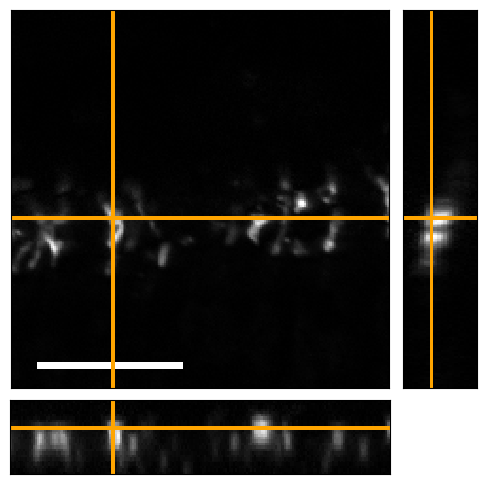

In [4]:
# Load image
image = cle.imread(images + "C1-p20-20x-zoom-flo-1.4-replicate-21.tif")

# Predict image
prediction = predict_image(image=image, classifier=quapos_lm)

# Rescale image
image_rescaled = rescale_image(image=image,
                               voxel_x=0.323,
                               voxel_y=0.323,
                               voxel_z=0.490)

# Rescale prediction
prediction_rescaled = rescale_segmentation(segmentation=prediction,
                                           voxel_x=0.323,
                                           voxel_y=0.323,
                                           voxel_z=0.490)

# Compute orhtogonal view
orthogonal_view(image_3d=image_rescaled[..., 50:250, 200:400],
                x_coordinate=54,
                y_coordinate=110,
                z_coordinate=15,
                cross_colour="orange",
                cross_thickness=1,
                scale_bar_length=25,
                scale_colour="white",
                save_path=save_path + "02-a-orthogonal-view-image.png")

3 3 lens
3 2 lens
3 3 lens
3 3 lens
Plot is saved to: ../../plots-images/quapos-paper/figure-2-images/02-b-orthogonal-view-image.png


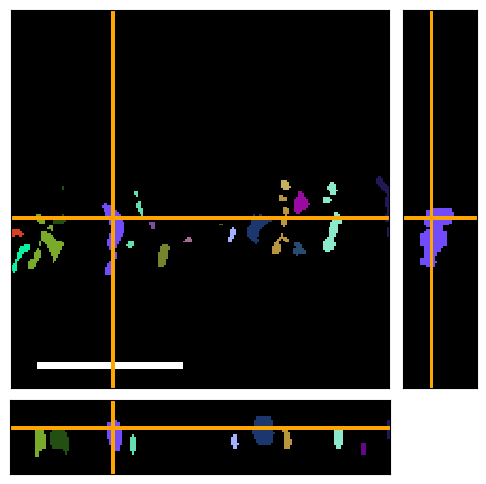

In [6]:
# Compute orhtogonal view
orthogonal_view(image_3d=prediction_rescaled[..., 50:250, 200:400],
                x_coordinate=54,
                y_coordinate=110,
                z_coordinate=15,
                cross_colour="orange",
                cross_thickness=1,
                scale_bar_length=25,
                scale_colour="white",
                save_path=save_path + "02-b-orthogonal-view-prediction.png",
                labels=True)